In [ ]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, decode_predictions

from PIL import Image
import requests
from io import BytesIO

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2020-12-23 06:48:38--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.196.32.25, 2600:1408:8c00:5a9::e59, 2600:1408:8c00:596::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.196.32.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   278MB/s    in 2.8s    

2020-12-23 06:48:41 (278 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
ls

kagglecatsanddogs_3367a.zip  sample_data/


In [ ]:
!unzip kagglecatsanddogs_3367a.zip >uz

In [ ]:
print(len(glob("PetImages/Cat/*.jpg")))
print(len(glob("PetImages/Dog/*.jpg")))

12500
12500


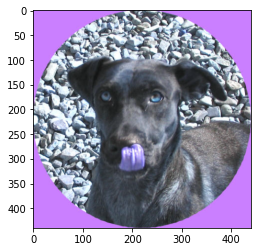

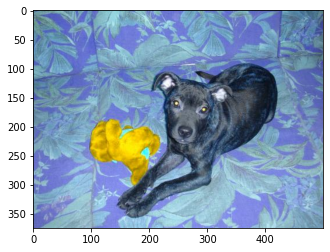

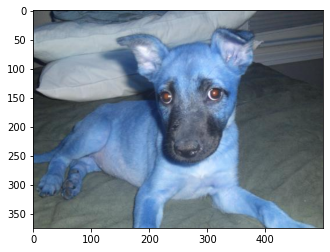

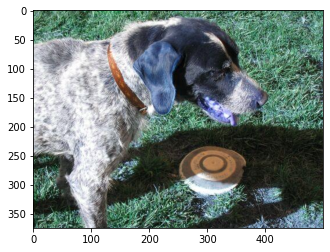

In [ ]:
for fn in glob("PetImages/Dog/*.jpg")[8:12]:
    img=cv2.imread(fn)
    plt.imshow(img)
    plt.show()

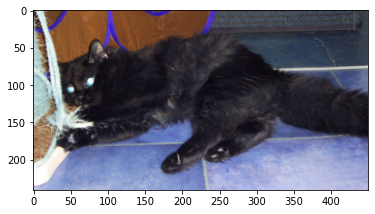

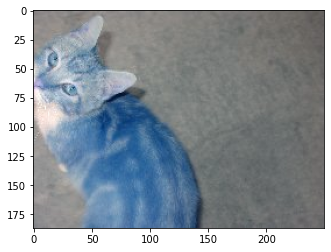

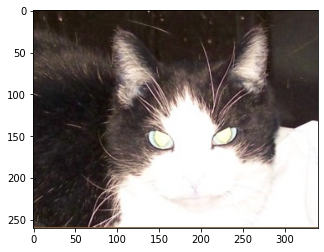

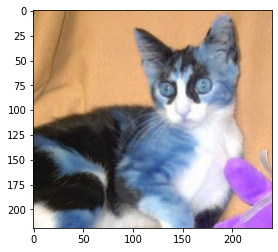

In [ ]:
for fn in glob("PetImages/Cat/*.jpg")[8:12]:
    img=cv2.imread(fn)
    plt.imshow(img)
    plt.show()

In [ ]:
#Аугментатор данных
train_datagen = ImageDataGenerator(
        preprocessing_function=keras.applications.resnet50.preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
from keras import layers

In [ ]:
model = keras.Sequential(
    [
      keras.Input(shape=(224,224,3)),
      layers.Conv2D(112, (3,3), padding="same"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(56, (3,3), padding="same"),
      layers.LeakyReLU(alpha=0.2),
      layers.MaxPooling2D(pool_size=(4, 4)),
      layers.Conv2D(14, (3,3), padding="same"),
      layers.LeakyReLU(alpha=0.2),
      layers.MaxPooling2D(pool_size=(4, 4)),
      layers.Flatten(),
      layers.Dense(20),
      layers.Dense(2),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 112)     3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 112)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 56)      56504     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 112, 112, 56)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 56)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 14)        7070      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 14)        0

In [ ]:
sgd = keras.optimizers.SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
train_generator = train_datagen.flow_from_directory(
        'PetImages',  #target directory
        target_size=(224, 224),  
        batch_size=64,
        class_mode='categorical')

Found 25000 images belonging to 2 classes.


In [ ]:
model.fit(train_generator, steps_per_epoch=2500//train_generator.batch_size, epochs=10)

Epoch 1/10
39/39 [==============================] - 30s 768ms/step - loss: 0.7906 - accuracy: 0.4551
Epoch 2/10
39/39 [==============================] - 30s 771ms/step - loss: 0.7647 - accuracy: 0.4491
Epoch 3/10
39/39 [==============================] - 30s 773ms/step - loss: 0.7396 - accuracy: 0.4539
Epoch 4/10
39/39 [==============================] - 30s 772ms/step - loss: 0.7333 - accuracy: 0.4704
Epoch 5/10
25/39 [==================>...........] - ETA: 10s - loss: 0.7227 - accuracy: 0.4875

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

39/39 [==============================] - 30s 773ms/step - loss: 0.7243 - accuracy: 0.4800
Epoch 6/10
39/39 [==============================] - 30s 768ms/step - loss: 0.7342 - accuracy: 0.4419
Epoch 7/10
39/39 [==============================] - 30s 765ms/step - loss: 0.7338 - accuracy: 0.4515
Epoch 8/10


UnknownError: ignored

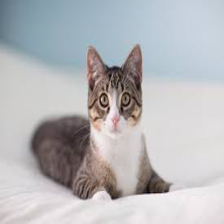

In [ ]:
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTP-GtfXSgRebgOPnZrjAJFGWuz0NnCq0TG9Q&usqp=CAU'
response = requests.get(url)
pil_im = Image.open(BytesIO(response.content))
pil_im=pil_im.resize((224,224))
pil_im

In [ ]:
x=np.asarray(pil_im)
x=preprocess_input(x)
x = np.expand_dims(x, 0)

res=model.predict(x)
res

array([[72.29796 , 69.421875]], dtype=float32)